In [61]:
import pandas as pd
import os
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:

sys.path.append('c:\\Users\\salah\\CKD\\src')

from model import define_and_train_models , save_models
from preprocessing import preprocess_data

In [19]:
DATA_PATH = '../data/raw.csv'
TARGET_COLUMN = 'classification' 

In [54]:
# Preprocessing
X, y = preprocess_data(DATA_PATH , TARGET_COLUMN)
data = pd.read_csv(DATA_PATH)

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
trained_models = define_and_train_models(X_train, y_train)

Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.



In [22]:
# Evaluate models
accuracies = {}
for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))

# Print accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy:.4f}")


Evaluating Logistic Regression...
Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Evaluating SVM...
SVM Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Evaluating Decision Tree...
Decision Tree Accuracy: 0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.00      1.00      0.00         0
           2  

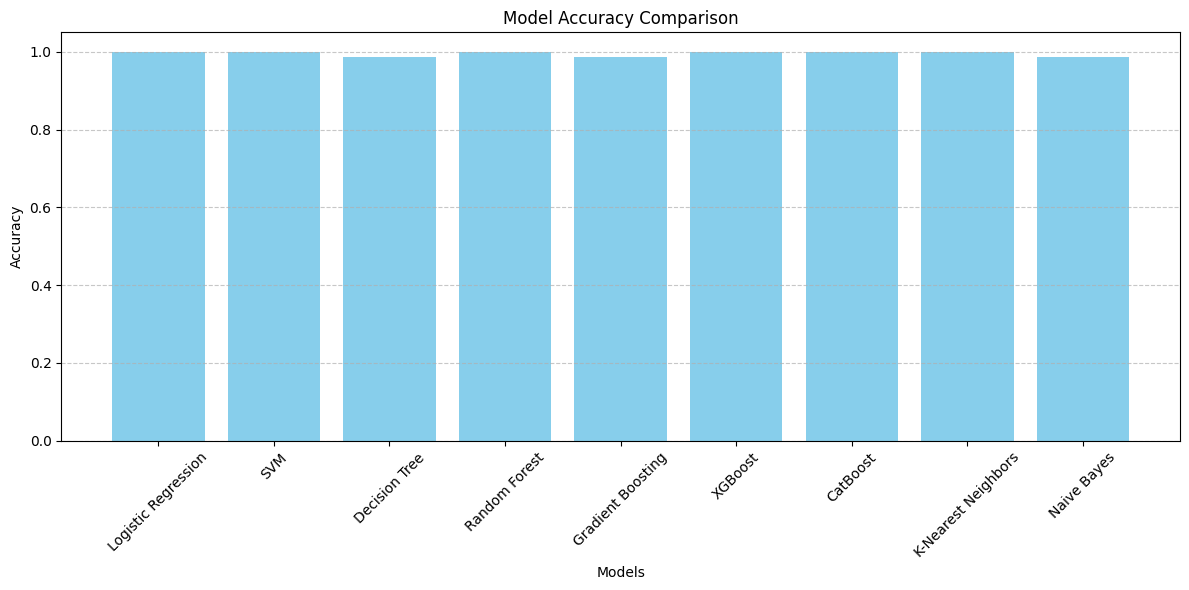

In [23]:
# Plot accuracies
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Spliting Data for different test to train Ratios


Testing with split ratio (test_size=0.1):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.2):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.3):
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...
Training K-Nearest Neighbors...
Training Naive Bayes...
All models have been trained successfully.


Testing with split ratio (test_size=0.4):
Training Logist

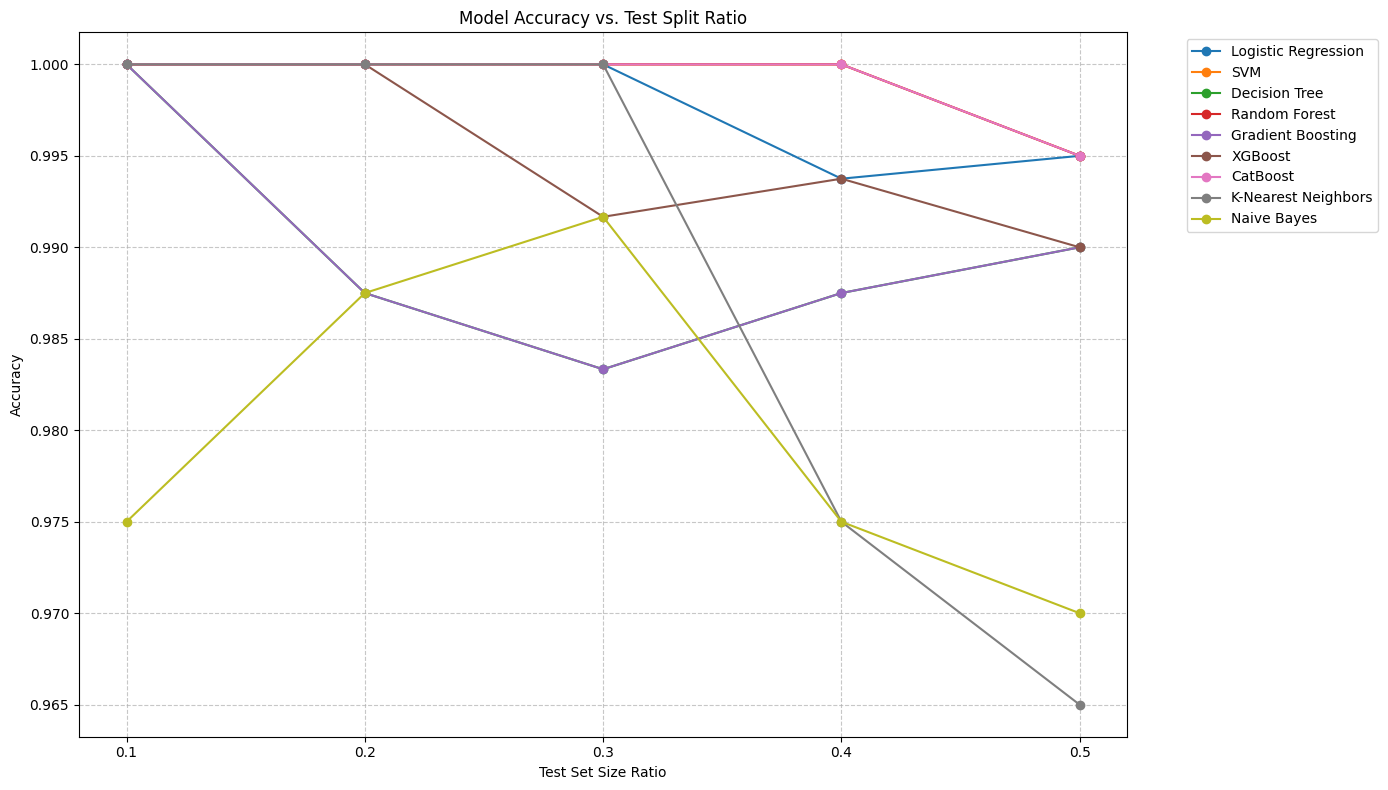

In [34]:

split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5] 
accuracy_results = {name: [] for name in [
    "Logistic Regression",
    "SVM",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost",
    "CatBoost",
    "K-Nearest Neighbors",
    "Naive Bayes"
]}


for test_size in split_ratios:
    print(f"\nTesting with split ratio (test_size={test_size}):")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    trained_models = define_and_train_models(X_train, y_train)
    
    for name, model in trained_models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[name].append(accuracy)


plt.figure(figsize=(14, 8))
for model_name, accuracies in accuracy_results.items():
    plt.plot(split_ratios, accuracies, marker='o', label=model_name)

plt.title("Model Accuracy vs. Test Split Ratio")
plt.xlabel("Test Set Size Ratio")
plt.ylabel("Accuracy")
plt.xticks(split_ratios)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Evaluating Logistic Regression...
Evaluating SVM...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating K-Nearest Neighbors...
Evaluating Naive Bayes...


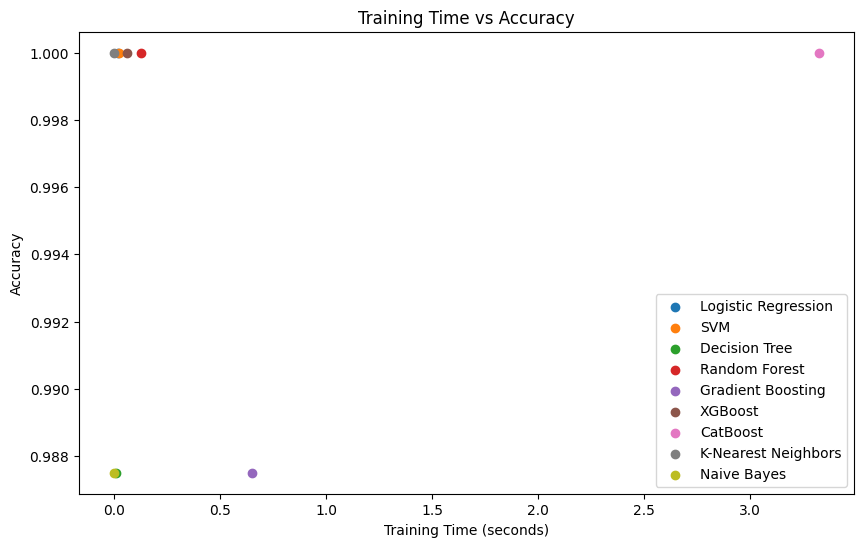

In [32]:
# Ensure accuracies is a dictionary
accuracies = {}

# Training times
training_times = {}
for name, model in trained_models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times[name] = time.time() - start_time
    
    # Evaluate model
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Scatter Plot
plt.figure(figsize=(10, 6))
for name in accuracies.keys():
    plt.scatter(training_times[name], accuracies[name], label=name)
plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Training Time vs Accuracy")
plt.legend()
plt.show()


Generating learning curve for Logistic Regression...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for SVM...
Generating learning curve for Decision Tree...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for Random Forest...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for Gradient Boosting...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for XGBoost...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for CatBoost...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for K-Nearest Neighbors...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Generating learning curve for Naive Bayes...


c:\Users\salah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


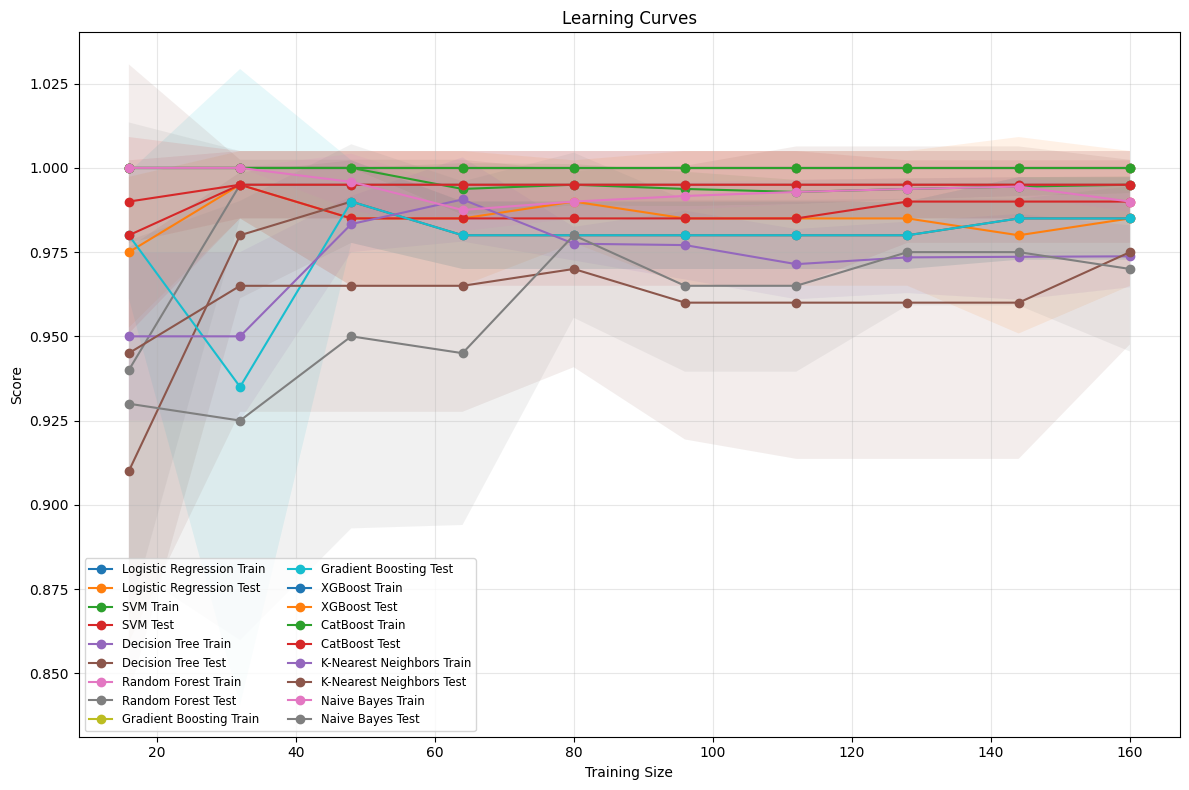

In [69]:
plt.figure(figsize=(12, 8))

for name, model in trained_models.items():
    print(f"Generating learning curve for {name}...")
    
    # Get learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        model, 
        X_train, 
        y_train, 
        cv=5, 
        n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate mean and standard deviation for scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve for training data
    plt.plot(train_sizes, train_mean, 'o-', label=f'{name} Train')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

    # Plot learning curve for testing data
    plt.plot(train_sizes, test_mean, 'o-', label=f'{name} Test')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curves")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best", fontsize='small', ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
